# Steps:
1. Create a new conda environment `python_ml`
2. install the following packages
   1. python  (conda install python)
      1. pandas
      2. numpy
      3. matplotlib
      4. seaborn
      5. scipy
      6. scikit-learn
      7. jupyter
      8. openpyxl
      9. plotly
   
pip install pandas numpy matplotlib seaborn scipy scikit-learn jupyter openpyxl plotly

## Dealing with missing  values

In [1]:
pip install nbconvert


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Text(0.5, 1.0, 'Missing  Values')

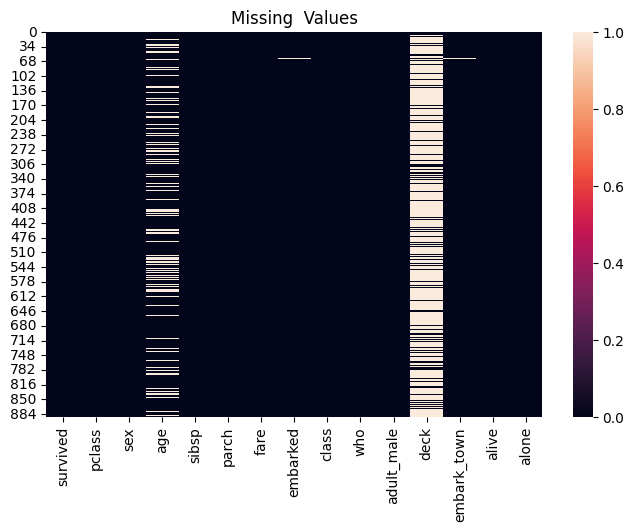

In [3]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),cbar=True)
plt.title('Missing  Values')

In [4]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [5]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False).round(2)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

In [6]:
df['age']=df['age'].fillna(df['age']).median()
df['age'].isnull().sum()

0

In [7]:
df['age'].mean().round(2)

28.0

In [8]:
df['age'].median()

28.0

In [9]:
df.drop('deck',axis=1,inplace=True)

In [10]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [11]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])   #means k zero mode k sath k fill krna
df['embark_town'].isnull().sum()

0

In [12]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
df['embarked'].isnull().sum()

0

## we can also impute missing values using sk-learn

In [13]:
#import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
#load the data
kashti=sns.load_dataset('titanic')

In [14]:
#impute age column using simpleimputer from sklearn
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
kashti['age']=imputer.fit_transform(kashti[['age']])


In [15]:
kashti.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,28.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,28.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,28.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,28.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,28.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


## Multivariate imputation


In [17]:
data=sns.load_dataset('titanic')

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#impute age column using simpleimputer from sklearn
imputer=IterativeImputer()
data['age']=imputer.fit_transform(data[['age']])

In [19]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Forward and backword fill

In [20]:
#using forward fill impute age column
data['age']=data['age'].ffill
data['age'].isnull().sum()

0

## Imputation using KNN 

In [21]:
kash=sns.load_dataset('titanic')

In [22]:
from sklearn.impute import KNNImputer

#impute age column using Knn imputer
imputer=KNNImputer(n_neighbors=5)
kash['age']=imputer.fit_transform(kash[['age']])

In [23]:
kash.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# drop missing values rowa

In [24]:
kash.dropna(inplace=True)